<a href="https://colab.research.google.com/github/rahulhirur/SignalProcessing/blob/main/FWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyWavelets

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [ ]:
# Generate time values
t1 = np.linspace(0, 2*np.pi, 500)  # 0 to 5 seconds
t2 = np.linspace(2*np.pi, 4*np.pi, 500)  # 5 to 10 seconds
t = np.concatenate((t1, t2))

In [ ]:
# Generate the signal
signal1 = np.sin(2*t1)  # sin(x) from 0 to 5 seconds
signal2 = np.sin(3* t2)  # sin(3x) from 5 to 10 seconds
signal = np.concatenate((signal1, signal2))


In [ ]:
# Perform the Fast Wavelet Transform
coeffs = pywt.wavedec(signal, 'db4', level=4)

Text(0, 0.5, 'Amplitude')

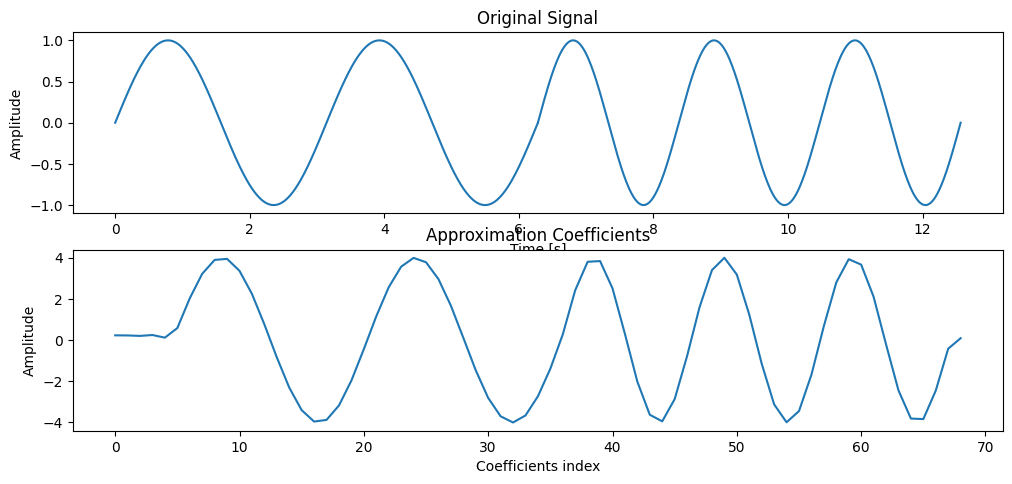

In [ ]:
# Plot the original signal
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the approximation coefficients
plt.subplot(3, 1, 2)
plt.plot(coeffs[0])
plt.title('Approximation Coefficients')
plt.xlabel('Coefficients index')
plt.ylabel('Amplitude')



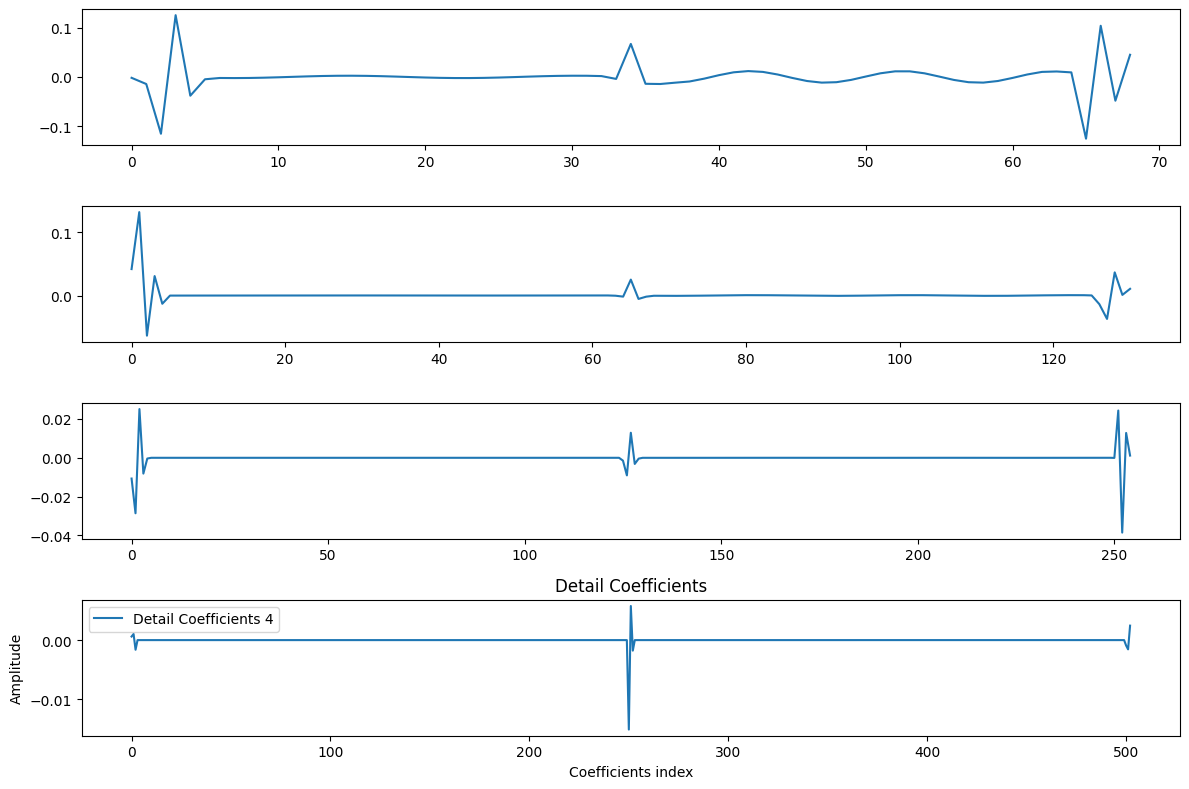

In [ ]:
# Plot the detail coefficients
plt.figure(figsize=(12, 8))
for i, detail_coeffs in enumerate(coeffs[1:], 1):

  plt.subplot(4, 1, i)
  # plt.plot(t, signal)
  plt.plot(detail_coeffs, label=f'Detail Coefficients {i}')

plt.title('Detail Coefficients')
plt.xlabel('Coefficients index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
np.size(coeffs)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [ ]:
len(coeffs[0])

69

In [ ]:
coeffs[0]

array([ 0.23076786,  0.22561922,  0.20296566,  0.2462144 ,  0.11828076,
        0.58401395,  2.02931495,  3.21842418,  3.89204585,  3.94228754,
        3.36110215,  2.2415768 ,  0.76302329, -0.83774191, -2.30432792,
       -3.40183505, -3.95447814, -3.8737416 , -3.17255684, -1.96323098,
       -0.43945896,  1.15470019,  2.56391368,  3.56247104,  3.99043566,
        3.77926143,  2.96277163,  1.67174156,  0.1129525 , -1.46392789,
       -2.80633434, -3.69925617, -3.99974531, -3.66054096, -2.71975034,
       -1.42857138,  0.41527947,  3.0578085 ,  3.97768009,  2.45121057,
       -0.58279527, -3.25837208, -3.92999447, -2.18460321,  0.90435629,
        3.43712125,  3.855998  ,  1.90337019, -1.21986275, -3.59285929,
       -3.75618607, -1.60939433,  1.52720237,  3.72454357,  3.63122693,
        1.30464377, -1.82431756, -3.83129247, -3.48195714, -0.99115877,
        2.10921915,  3.91239132,  3.30937624,  0.67098911, -2.37972171,
       -3.9767465 , -3.05742047, -0.54937238,  0.12044983])

Detail Level 1 captures frequencies between 25.0 and 50.0 Hz
Max detail coefficient at level 1 occurs at time 0.18 seconds


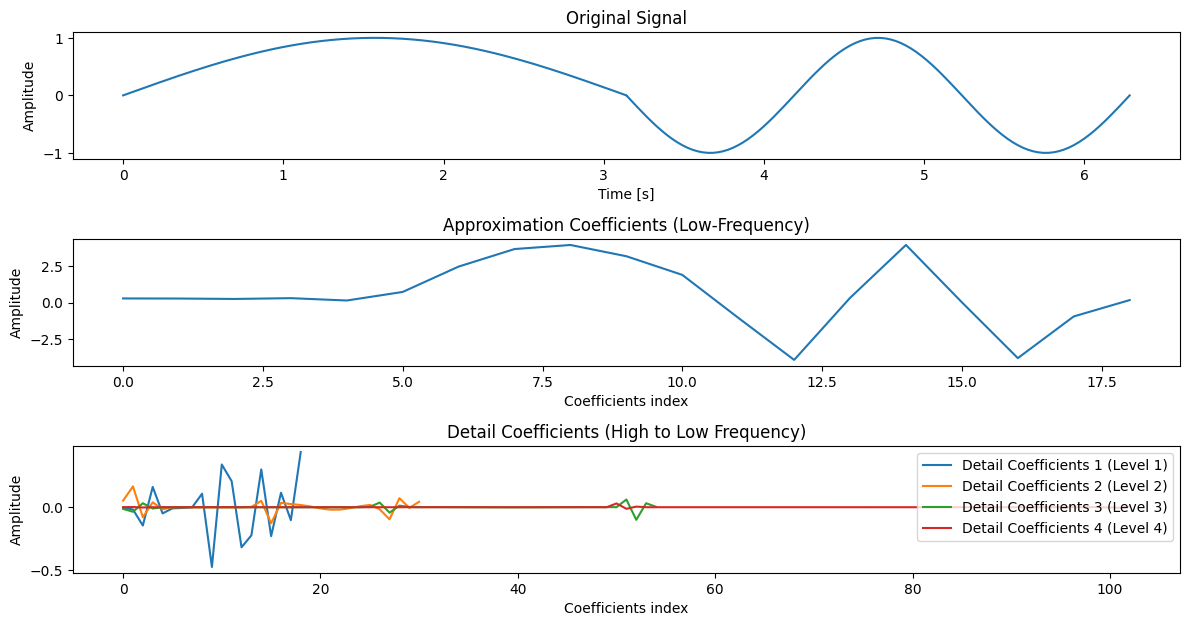

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate time values
sampling_rate = 100  # Samples per second
t1 = np.linspace(0, np.pi, 1 * sampling_rate)  # 0 to 5 seconds
t2 = np.linspace(np.pi, 2*np.pi, 1 * sampling_rate)  # 5 to 10 seconds
t = np.concatenate((t1, t2))

# Generate the signal
signal1 = np.sin(t1)  # sin(x) from 0 to 5 seconds
signal2 = np.sin(3 * t2)  # sin(3x) from 5 to 10 seconds
signal = np.concatenate((signal1, signal2))

# Perform the Fast Wavelet Transform
coeffs = pywt.wavedec(signal, 'db4', level=4)

# Plot the original signal
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the approximation coefficients (first element of coeffs)
plt.subplot(4, 1, 2)
plt.plot(coeffs[0])
plt.title('Approximation Coefficients (Low-Frequency)')
plt.xlabel('Coefficients index')
plt.ylabel('Amplitude')

# Plot the detail coefficients (remaining elements of coeffs)
plt.subplot(4, 1, 3)
for i, detail_coeffs in enumerate(coeffs[1:], 1):
    plt.plot(detail_coeffs, label=f'Detail Coefficients {i} (Level {i})')
plt.title('Detail Coefficients (High to Low Frequency)')
plt.xlabel('Coefficients index')
plt.ylabel('Amplitude')
plt.legend()

# Frequency and time information
detail_level = 1  # Detail level to inspect, for example, D1
frequency_band = [sampling_rate / (2 ** (detail_level + 1)), sampling_rate / (2 ** detail_level)]
time_index = np.argmax(np.abs(coeffs[detail_level]))  # Index of max detail coefficient

# Convert coefficient index to time
time_at_max_coefficient = time_index * (1 / sampling_rate) * (2 ** detail_level)

print(f'Detail Level {detail_level} captures frequencies between {frequency_band[0]} and {frequency_band[1]} Hz')
print(f'Max detail coefficient at level {detail_level} occurs at time {time_at_max_coefficient:.2f} seconds')

plt.tight_layout()
plt.show()

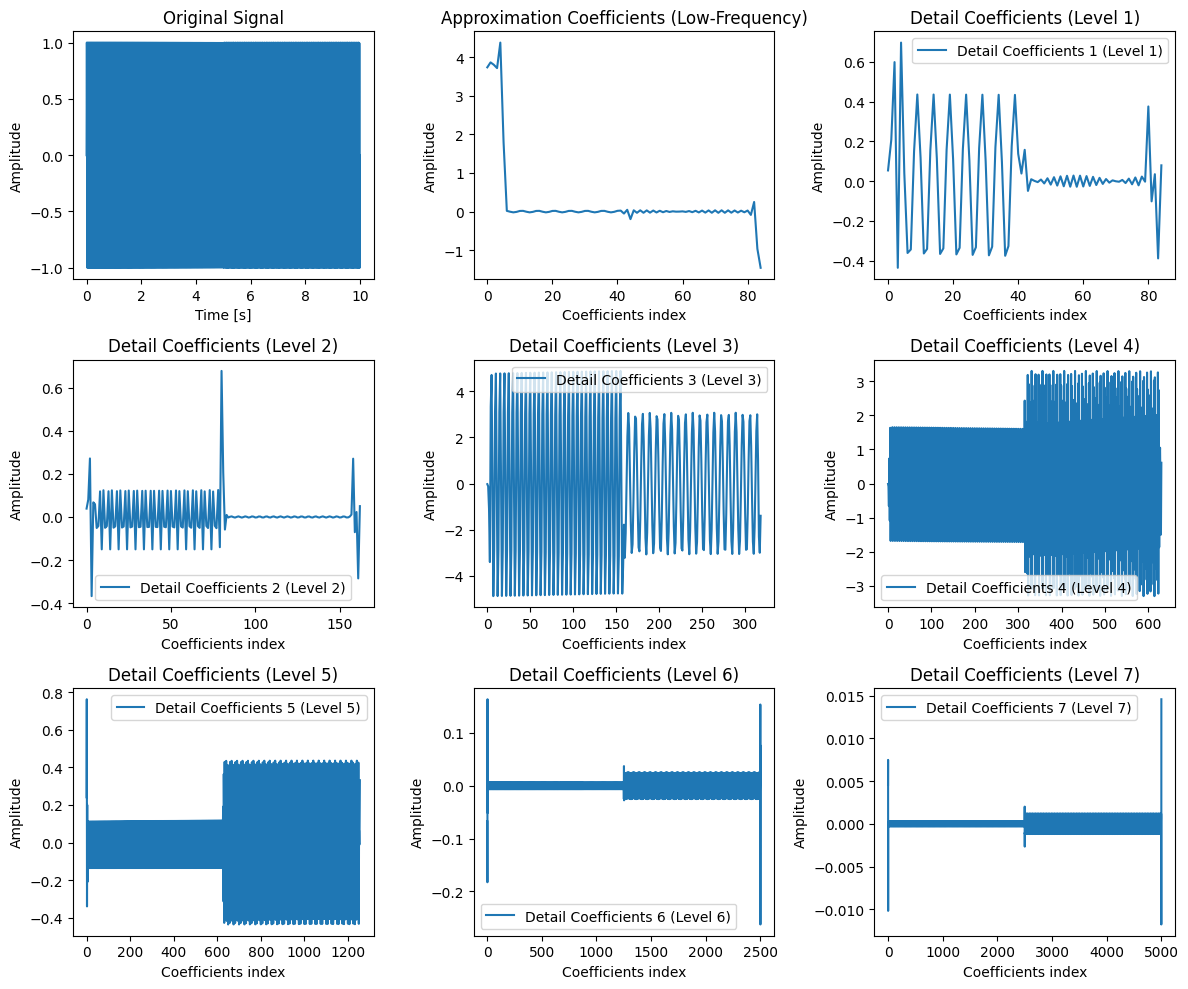

Detail Level 1 captures frequencies between 250.0 and 500.0 Hz
Max detail coefficient at level 1 occurs at time 0.47 seconds


In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Sampling parameters
sampling_rate = 1000  # Samples per second
duration = 10  # Total duration in seconds

# Generate time values
t = np.linspace(0, duration, duration * sampling_rate)

# Generate the signal: 25 Hz from 0 to 5 seconds, 35 Hz from 5 to 10 seconds
signal = np.piecewise(t, [t < 5, t >= 5], [lambda t: np.sin(2 * np.pi * 25 * t), lambda t: np.sin(2 * np.pi * 35 * t)])

# Perform the Fast Wavelet Transform
coeffs = pywt.wavedec(signal, 'db4', level=7)

# Plot the original signal
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the approximation coefficients (first element of coeffs)
plt.subplot(3, 3, 2)
plt.plot(coeffs[0])
plt.title('Approximation Coefficients (Low-Frequency)')
plt.xlabel('Coefficients index')
plt.ylabel('Amplitude')

# Plot the detail coefficients (remaining elements of coeffs)
for i, detail_coeffs in enumerate(coeffs[1:], 3):
    # print(i)
    plt.subplot(3, 3, i)
    plt.plot(detail_coeffs, label=f'Detail Coefficients {i-2} (Level {i-2})')
    plt.title(f'Detail Coefficients (Level {i-2})')
    plt.xlabel('Coefficients index')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

# Frequency and time information
detail_level = 1  # Detail level to inspect, for example, D1
frequency_band = [sampling_rate / (2 ** (detail_level + 1)), sampling_rate / (2 ** detail_level)]

# For detail level D1, the time localization should be considered in terms of the index
coeff_index = np.argmax(np.abs(coeffs[detail_level]))  # Index of max detail coefficient
time_at_max_coefficient = (coeff_index * len(signal)) / len(coeffs[detail_level]) / sampling_rate

print(f'Detail Level {detail_level} captures frequencies between {frequency_band[0]} and {frequency_band[1]} Hz')
print(f'Max detail coefficient at level {detail_level} occurs at time {time_at_max_coefficient:.2f} seconds')


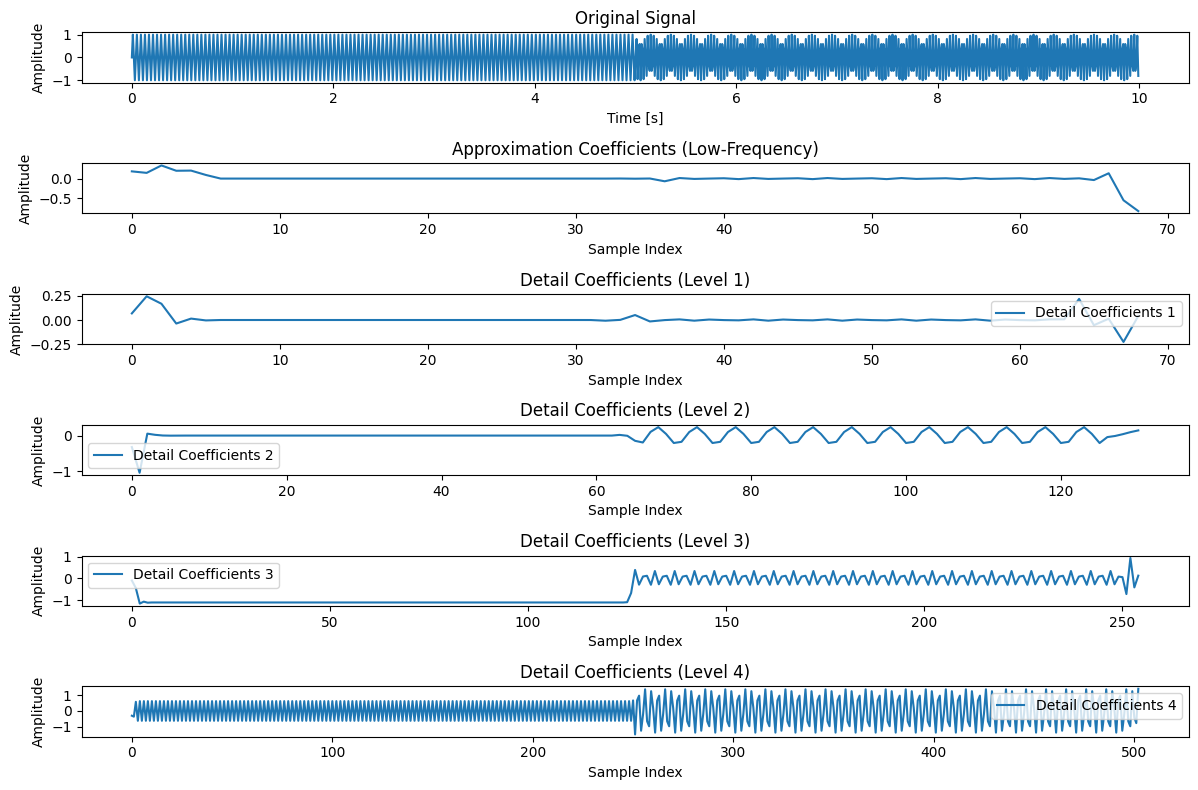

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Sampling parameters
sampling_rate = 100  # Samples per second
duration = 10  # Total duration in seconds
num_samples = sampling_rate * duration

# Generate time values
t = np.linspace(0, duration, num_samples, endpoint=False)

# Generate the signal: 25 Hz from 0 to 5 seconds, 35 Hz from 5 to 10 seconds
signal = np.piecewise(t, [t < 5, t >= 5], [lambda t: np.sin(2 * np.pi * 25 * t), lambda t: np.sin(2 * np.pi * 35 * t)])

# Perform the Fast Wavelet Transform
coeffs = pywt.wavedec(signal, 'db4', level=4)

# Plot the original signal
plt.figure(figsize=(12, 8))
plt.subplot(6, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the approximation coefficients (first element of coeffs)
plt.subplot(6, 1, 2)
plt.plot(coeffs[0])
plt.title('Approximation Coefficients (Low-Frequency)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the detail coefficients (remaining elements of coeffs)
for i, detail_coeffs in enumerate(coeffs[1:], 3):
    plt.subplot(6, 1, i)
    plt.plot(detail_coeffs, label=f'Detail Coefficients {i-2}')
    plt.title(f'Detail Coefficients (Level {i-2})')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


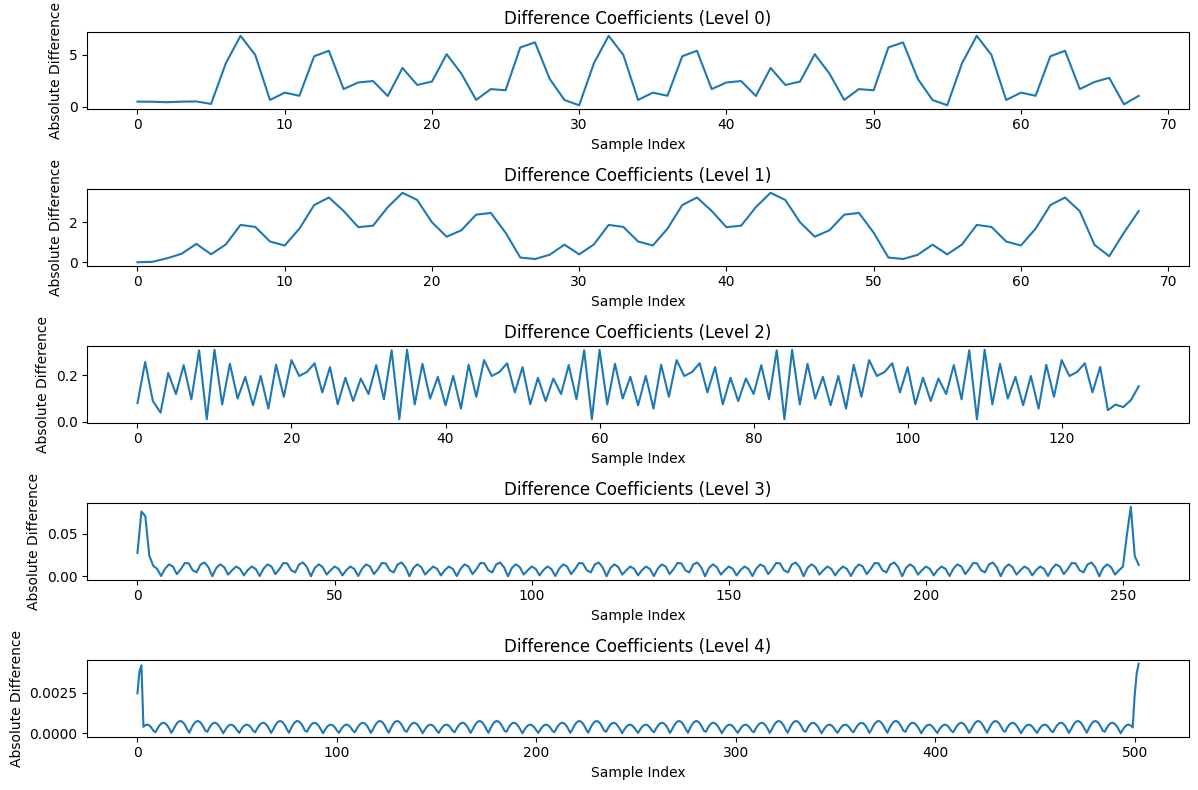

In [29]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate example signals
sampling_rate = 100  # Samples per second
duration = 10  # Total duration in seconds
num_samples = sampling_rate * duration
t = np.linspace(0, duration, num_samples, endpoint=False)

# Original signal
signal1 = np.sin(2 * np.pi * 2 * t)
signal2 = np.sin(2 * np.pi * 3 * t)

# Perform FWT on both signals
coeffs1 = pywt.wavedec(signal1, 'db4', level=4)
coeffs2 = pywt.wavedec(signal2, 'db4', level=4)

# Calculate the absolute difference between coefficients
difference_coeffs = [np.abs(c1 - c2) for c1, c2 in zip(coeffs1, coeffs2)]

# Plot the difference coefficients
plt.figure(figsize=(12, 8))
for i, diff_coeffs in enumerate(difference_coeffs):
    plt.subplot(5, 1, i+1)
    plt.plot(diff_coeffs)
    plt.title(f'Difference Coefficients (Level {i})')
    plt.xlabel('Sample Index')
    plt.ylabel('Absolute Difference')
plt.tight_layout()
plt.show()


In [65]:
# Sampling parameters
sampling_rate = 100  # Samples per second
duration = 4 * np.pi  # Total duration

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the signal: 20 Hz from 0 to 2*pi, 30 Hz from 2*pi to 4*pi
signal1 = np.piecewise(t, [t < 2 * np.pi, t >= 2 * np.pi],
                      [lambda t: np.sin(2 * np.pi * 40 * t),
                       lambda t: np.sin(2 * np.pi * 6 * t)])

# Generate the signal: 20 Hz from 0 to 2*pi, 30 Hz from 2*pi to 4*pi
signal2 = np.piecewise(t, [t < 2 * np.pi, t >= 2 * np.pi],
                      [lambda t: np.sin(2 * np.pi * 5 * t),
                       lambda t: np.sin(2 * np.pi * 6 * t)])

26.91082323512865


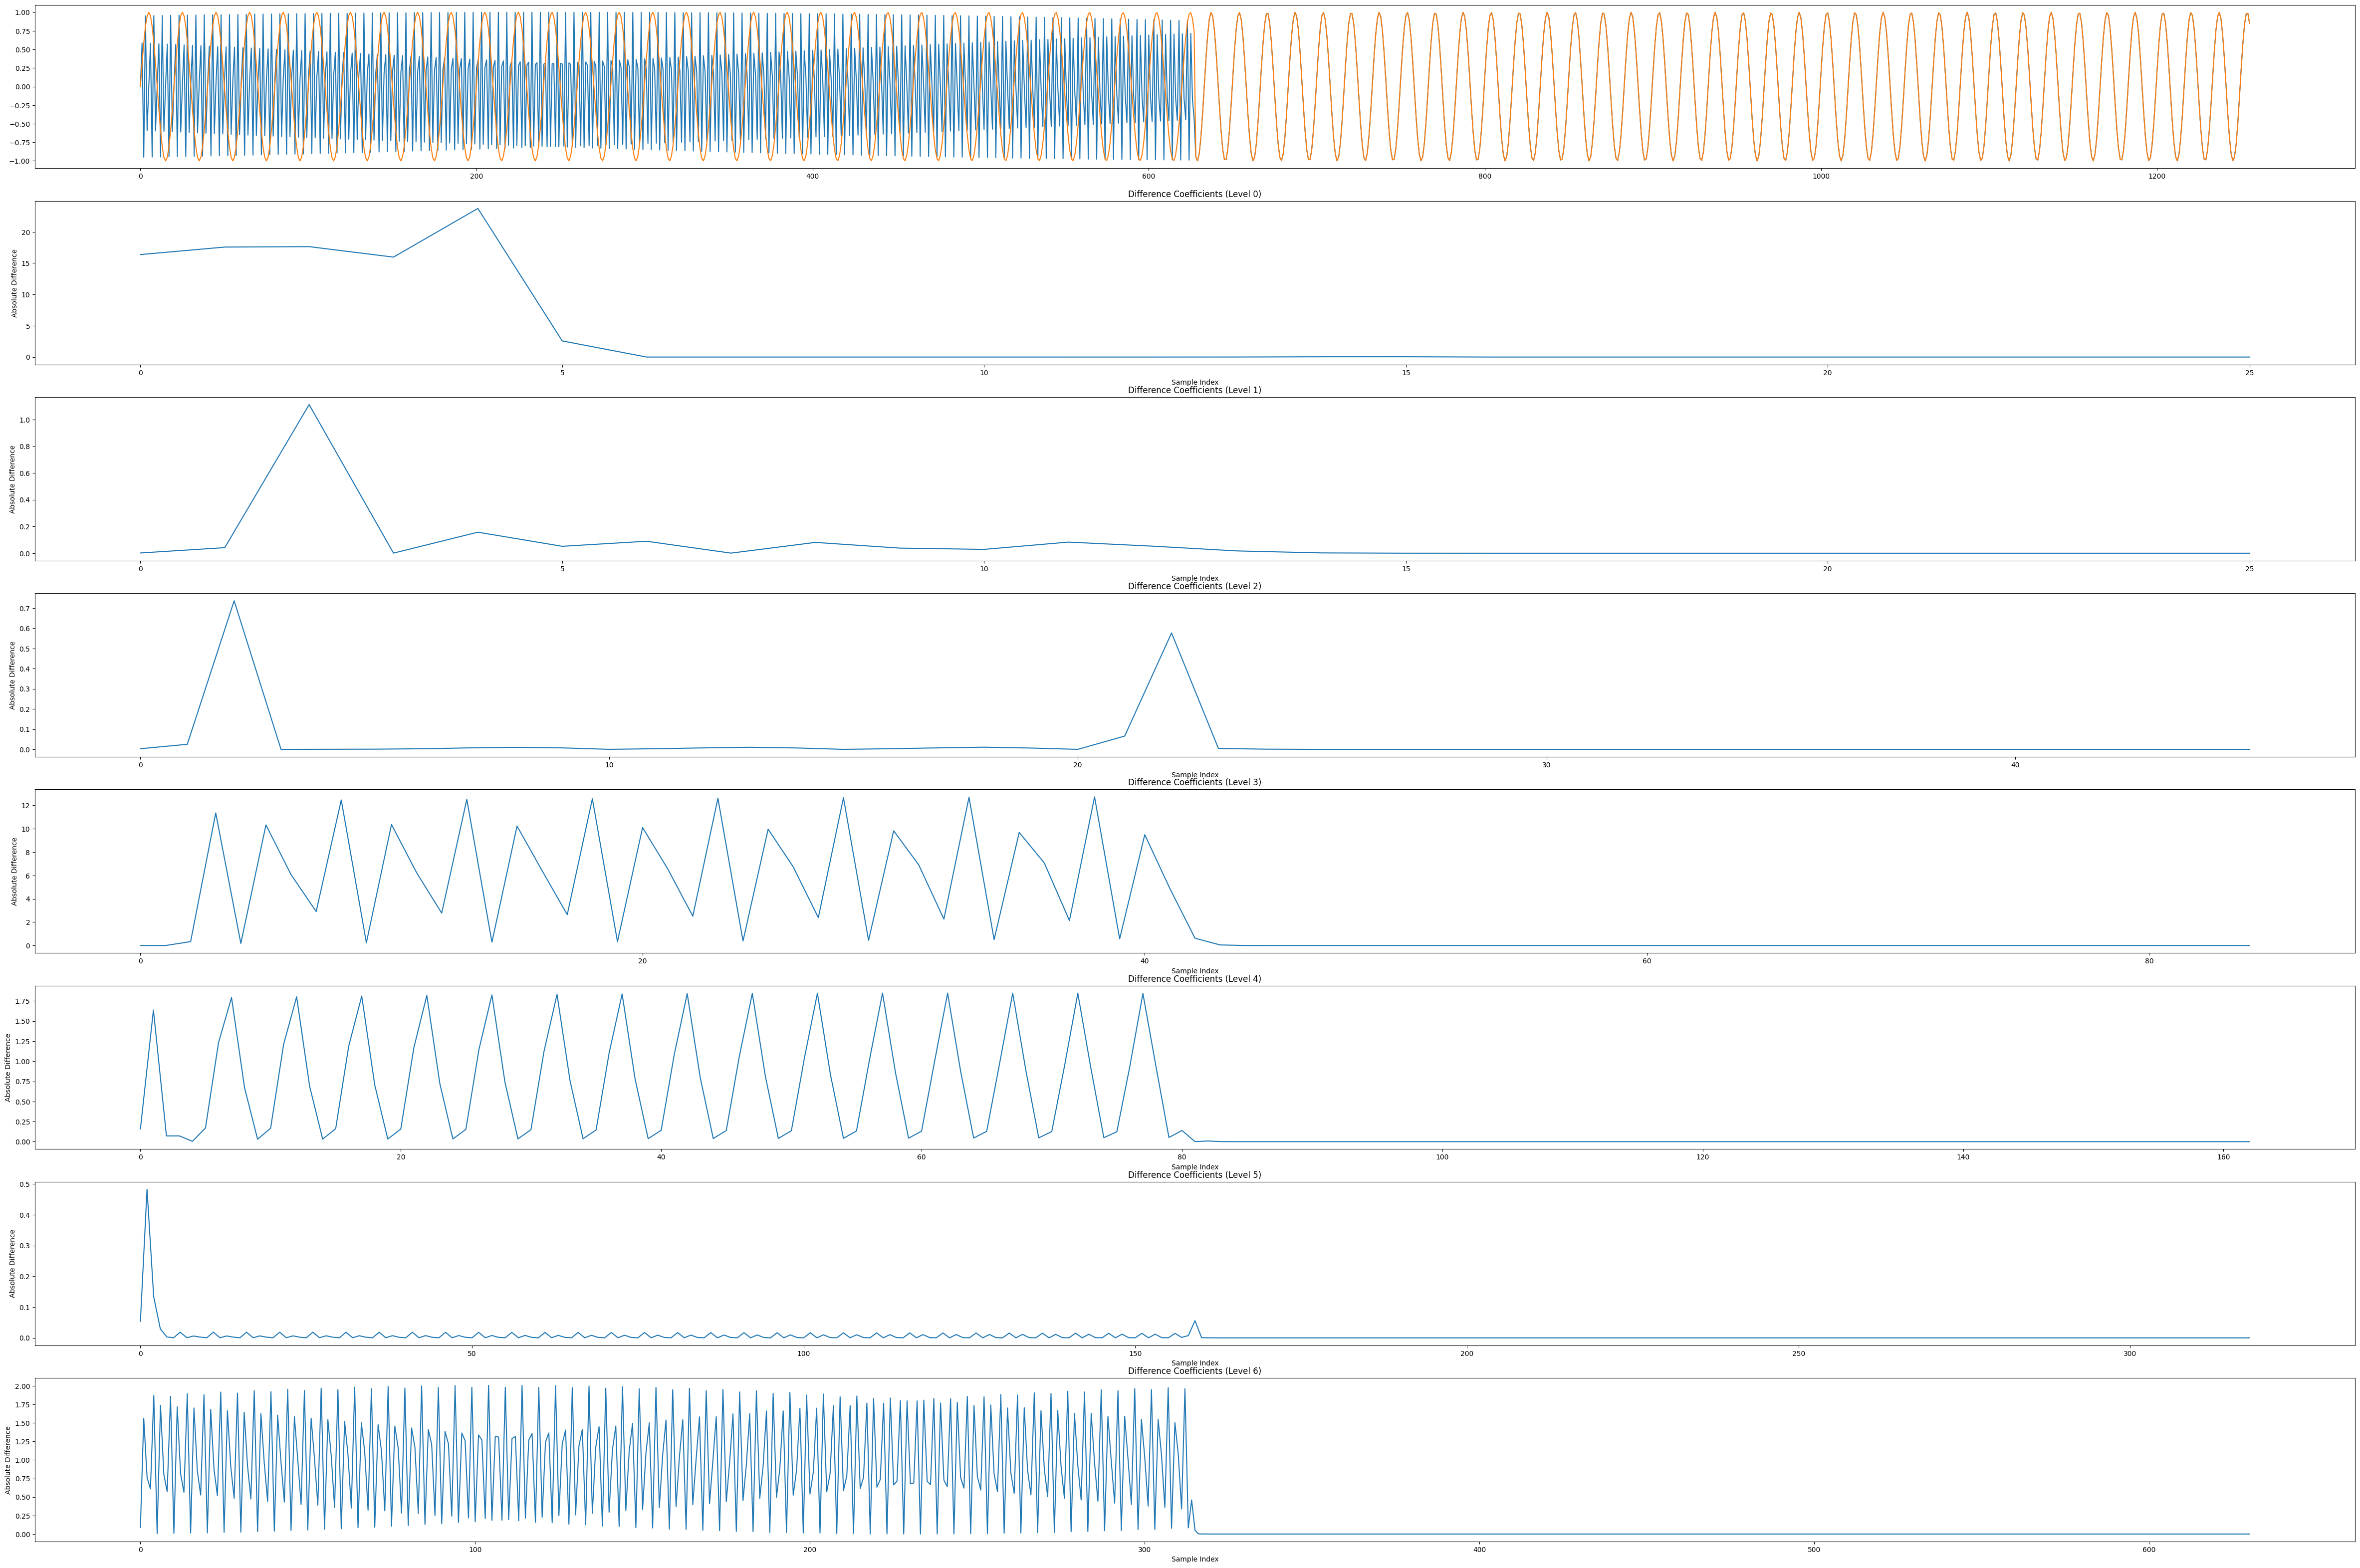

In [66]:
# Perform FWT on both signals
lvls =6
coeffs1 = pywt.wavedec(signal1, 'db4', level=lvls)
coeffs2 = pywt.wavedec(signal2, 'db4', level=lvls)

# Calculate the absolute difference between coefficients
difference_coeffs = [np.abs(c1 - c2)**2 for c1, c2 in zip(coeffs1, coeffs2)]

def wavelet_l2_norm(coeffs1, coeffs2):
    l2_norm = np.sqrt(sum(np.sum((c1 - c2) ** 2) for c1, c2 in zip(coeffs1, coeffs2)))
    return l2_norm

plsize=5

plt.figure(figsize=(12*plsize, 8*plsize))

plt.subplot(lvls+2, 1, 1)
plt.plot(signal1)
plt.plot(signal2)
# Plot the difference coefficients
for i, diff_coeffs in enumerate(difference_coeffs):
    plt.subplot(lvls+2, 1, i+2)
    plt.plot(diff_coeffs)
    plt.title(f'Difference Coefficients (Level {i})')
    plt.xlabel('Sample Index')
    plt.ylabel('Absolute Difference')

print(wavelet_l2_norm(coeffs1, coeffs2))
plt.show()